<a href="https://colab.research.google.com/github/babycamel/Teaching/blob/master/optimization_and_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization

Chapter 3 is concerned with optimization and Chapter 4 with regression. We'll start with optimization

we wish to maximize net benefits

$NB(X) = B(x) - C(x)$







In [ ]:
# Imports some things we will need
from sympy import diff # This allows us to take derivatives (slopes) of functions/curves
from sympy.solvers import solve #This lets us solve equations
from sympy import symbols #This lets us define symbols
from sympy.plotting import plot #This lets us plot graphs

In [ ]:
# Define symbols
a, b, c, d, e, X = symbols('a, b, c, d, e, X')

In [ ]:
NB = a*X - b*X**2 - (c*X - d*X**2 + e*X**3)
NB

-X**3*e - X**2*b + X**2*d + X*a - X*c

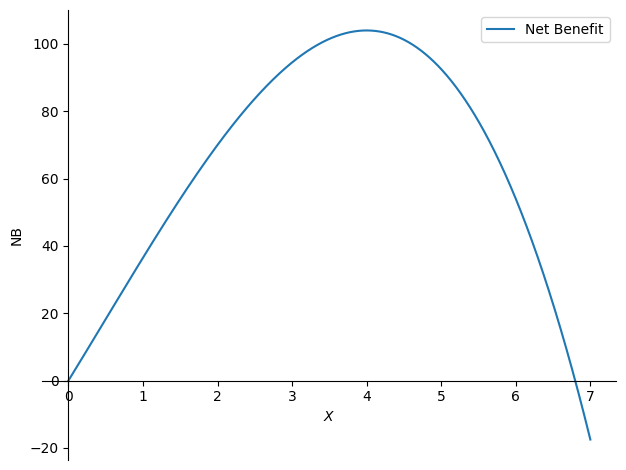

In [ ]:
# This is more or less equivalent to the copy down method and then eyeball the solution
NBnum = NB.subs({a:60,b:0.5,c:24,d:2,e:1})
plot(NBnum, (X,0,7),ylabel ='NB',legend = True, label = ['Net Benefit'] )

The graph achieves a maximim when it's slope (derivative)  is zero.

We can use SymPy to calculate the derivative (slope) of NB with respect to X.


In [ ]:
foc = diff(NB,X) #first-order conditon for a maximum this calculates the slope of the net benefit curve

Now we solve for X by setting the slope to zero. The SymPy command sets it to zero automatically.

When the slope of $NB(X)$ is zero then the slope of $B(X)$ will equal the slope of $C(X)$.

In words marginal benefits = marginal costs.


In [ ]:
sol = solve(foc,X) #solve for X
sol #solution

[(-b + d - sqrt(3*a*e + b**2 - 2*b*d - 3*c*e + d**2))/(3*e),
 (-b + d + sqrt(3*a*e + b**2 - 2*b*d - 3*c*e + d**2))/(3*e)]

There are two solutions check against Textbook Chapter 3 Mathematical appendix

In [ ]:
answer0 = sol[0].subs({a:60,b:0.5,c:24,d:2,e:1}) #sol[0] selects the first solution and then I subsittute vlaues for the parameters
answer1 = sol[1].subs({a:60,b:0.5,c:24,d:2,e:1}) #sol[1] selects the second solution
print('First solution:',answer0.n()) #.n() converts to a numerical form try just typing answer0 in a cell to see why i did this.
print('Second solution:',answer1.n())

First solution: -3.00000000000000
Second solution: 4.00000000000000


You can verify that this is the same as the answer in the textbook.

# Regression analysis

To do regression anlaysis in colab we will use a package called statmodels. It provides output similar to Excel's Regression Analyis Toolpak but has more options available. We will use the data from the google sheets tutorial.




In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


Google sheets documentation is available here

[Google sheets regression](https://support.google.com/docs/answer/3094249?hl=en)

Data for the example is avaiable here with an example calculation in the final row

[Example with data](https://docs.google.com/spreadsheets/d/1-F3w3L2RZIKY9eD1aI54pnzNLADZ-iNGvezY7479O0A/edit?usp=sharing)

See th tuprial under my announcement son Brightspace Week 2 for detialed explanation of these.


We are going to reproduce this example using statsmodels.



In [ ]:
from google.colab import files
files=files.upload() #this will prompt you to upload a file from your computer you only need to do this once then comment it out using a # at the beginning
# you should create an excel file with the data and upload it.

In [ ]:
df = pd.read_excel('Data-Regression-Example.xlsx', index_col=None) #This imports the data to a pandas data frame. you will need to renmae this is necessary to match your Excel file name
df # look at your data

,data_Y,data_X1,data_X2
0,5.00,1.0,9.0
1,8.50,2.5,12.0
2,10.00,3.1,13.0
3,11.20,4.0,14.0
4,14.00,4.7,14.5
5,16.00,5.3,16.0
6,16.80,6.0,17.0
7,18.55,7.1,19.0
8,20.00,9.0,19.6


In [ ]:
y = df['data_Y'] #This reads the Y data from the first column and passes it to the object y
y = y.to_numpy() #convert to a numpy object
y

array([ 5.  ,  8.5 , 10.  , 11.2 , 14.  , 16.  , 16.8 , 18.55, 20.  ])

In [ ]:
x1 = df['data_X1']
x2 = df['data_X2']
X = np.column_stack((x1, x2)) # if you have multiple x variables you will need to add them here.
X

array([[ 1. ,  9. ],
       [ 2.5, 12. ],
       [ 3.1, 13. ],
       [ 4. , 14. ],
       [ 4.7, 14.5],
       [ 5.3, 16. ],
       [ 6. , 17. ],
       [ 7.1, 19. ],
       [ 9. , 19.6]])

In [ ]:
X = sm.tools.add_constant(X) #this adds a column of ones to the data so we can estimate an intercept or constant
X

array([[ 1. ,  1. ,  9. ],
       [ 1. ,  2.5, 12. ],
       [ 1. ,  3.1, 13. ],
       [ 1. ,  4. , 14. ],
       [ 1. ,  4.7, 14.5],
       [ 1. ,  5.3, 16. ],
       [ 1. ,  6. , 17. ],
       [ 1. ,  7.1, 19. ],
       [ 1. ,  9. , 19.6]])

In [ ]:
model = sm.OLS(y, X) #define the model and estimation method OLS = orfdinary least squares
results = model.fit() #fit the model
print(results.summary()) #print the regression table

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     127.3
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           1.22e-05
Time:                        04:47:13   Log-Likelihood:                -9.7491
No. Observations:                   9   AIC:                             25.50
Df Residuals:                       6   BIC:                             26.09
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8392      4.193     -1.393      0.2

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


We are looking for the coef column these are the regression coefficients.

Also pay attention to the R squared, the F statistic and the t column ( t statistic) and the P>|t| column which list s the p-values. see the textbook for an explanation of these.

# Summary

So this should give you some idea of how poweerful the Google colaboratory platform and Jupyter notebooks are.

There really is nothing in the course that it can't do. Whereas spreadsheets can't do some of the algebra questions for you. SymPy has the ability to solve the algebra problems for you.
